Hello there! We have completed the project till extraction of tweets from twitter API using tweepy. Followed by, the removal of #,@ and re-tweets  and then the subjectivity and polarity of tweets are calculated, from which, we found whether the tweet is a postivie one or negative one neutral. We used Google Colab for the process. Still, we need to develop some features like, plotting and analysis. About 85% of the prototype is complete.

In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [3]:
from google.colab import files
uploaded = files.upload()

Saving sample_data.csv to sample_data.csv


In [5]:
log = pd.read_csv('sample_data.csv')

In [6]:
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [7]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

authenticate.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [8]:
posts = api.user_timeline(screen_name="BillGates",count=10, lang="en",tweet_mode='extended')
print("Show the 10 recent tweets: \n")
i=1
for tweet in posts[0:10]:
  print(str(i)+ ') '+ tweet.full_text + '\n\n')
  i=i+1

Show the 10 recent tweets: 

1) It’s been fantastic to learn from @djimdeab and @Ioyier who've been working on the reduction of malaria and many other disease elimination programs with the support of @wellcometrust. https://t.co/uyHw3zgZvc


2) To understand what it will take to get to zero, we need to start by asking where the 51 billion tons of emissions come from: https://t.co/S8d3tH98nk #MastersofScaleSummit https://t.co/oOb77eqPnD


3) The @Breakthrough Energy Summit is officially a wrap. Reaching net-zero emissions will be the hardest thing humanity has ever done – but I’m leaving today with an increased sense of hope. https://t.co/7zxKbypNOS


4) Literally. https://t.co/vorXxKoMlM


5) Today was pretty special. I was able to get hands on with innovative climate tech that could help us reach net-zero. https://t.co/2yb7WylIH4


6) The Five Grand Challenges can help us consider more ways to develop comprehensive solutions and reduce global emissions. Thank you, Project Art Collecti

In [9]:
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'])

df.head()



,Tweets
0,It’s been fantastic to learn from @djimdeab an...
1,To understand what it will take to get to zero...
2,The @Breakthrough Energy Summit is officially ...
3,Literally. https://t.co/vorXxKoMlM
4,Today was pretty special. I was able to get ha...


In [10]:
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) 
  text = re.sub(r'#', '',text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)

  return text

df['Tweets']=df['Tweets'].apply(cleanTxt)
  
df

,Tweets
0,It’s been fantastic to learn from and who've...
1,To understand what it will take to get to zero...
2,The Energy Summit is officially a wrap. Reach...
3,Literally.
4,Today was pretty special. I was able to get ha...
5,The Five Grand Challenges can help us consider...
6,This is the “FOCUS” art installation on displa...
7,Grateful for your and ’s leadership. While we ...
8,It’s unrealistic to expect people to stop tr...
9,Yesterday was an important step toward a polio...


In [11]:
def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getpolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getsubjectivity)
df['Polarity'] = df['Tweets'].apply(getpolarity)

df

,Tweets,Subjectivity,Polarity
0,It’s been fantastic to learn from and who've...,0.591667,0.258333
1,To understand what it will take to get to zero...,0.000000,0.000000
2,The Energy Summit is officially a wrap. Reach...,0.000000,0.000000
3,Literally.,0.000000,0.000000
4,Today was pretty special. I was able to get ha...,0.799107,0.401786
5,The Five Grand Challenges can help us consider...,0.500000,0.333333
6,This is the “FOCUS” art installation on displa...,0.916667,0.333333
7,Grateful for your and ’s leadership. While we ...,0.687500,0.437500
8,It’s unrealistic to expect people to stop tr...,0.666667,-0.125000
9,Yesterday was an important step toward a polio...,0.625000,0.258333


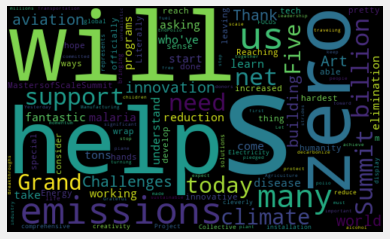

In [29]:
allWords=' '.join([twts for twts in df['Tweets']] )
wordCloud = WordCloud(width=500,height=300,random_state=21,max_font_size=190).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [28]:
def getanalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Postive'

df['Analysis']=df['Polarity'].apply(getanalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,It’s been fantastic to learn from and who've...,0.591667,0.258333,Postive
1,To understand what it will take to get to zero...,0.000000,0.000000,Neutral
2,The Energy Summit is officially a wrap. Reach...,0.000000,0.000000,Neutral
3,Literally.,0.000000,0.000000,Neutral
4,Today was pretty special. I was able to get ha...,0.799107,0.401786,Postive
5,The Five Grand Challenges can help us consider...,0.500000,0.333333,Postive
6,This is the “FOCUS” art installation on displa...,0.916667,0.333333,Postive
7,Grateful for your and ’s leadership. While we ...,0.687500,0.437500,Postive
8,It’s unrealistic to expect people to stop tr...,0.666667,-0.125000,Negative
9,Yesterday was an important step toward a polio...,0.625000,0.258333,Postive


In [ ]:
j=1
sorteddf=df.sort_values(by=['Polarity'])
for i in range(0,sorteddf.shape[0]):
  if (sorteddf['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sorteddf['Tweets'][i])
    print()
    j=j+1